<center><font size="10"> 🔥Ensemble Learning and Random Forests🔥 </font></center>

#### Aggregating the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an Ensemble Learning algorithm is called an **Ensemble method**.

<font size="3">Hard Voting👇</font>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)



In [62]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
log_clf = LogisticRegression()
rand_clf = RandomForestClassifier()
svm_clf = SVC()

In [64]:
voting_clf = VotingClassifier(
            estimators=[('lr', log_clf), ('rf', rand_clf), ('svc', svm_clf)], voting='hard')

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [65]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rand_clf, svm_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


#### The voting classifier slightly outperforms all the individual classifiers.🔥🔥

<font size="3"> Soft voting👇 </font>

In [66]:
log_clf_sft = LogisticRegression()
rand_clf_sft = RandomForestClassifier()
svm_clf_sft = SVC(probability=True)

In [67]:
voting_clf_sft = VotingClassifier(
            estimators=[('lr', log_clf_sft), ('rf', rand_clf_sft), ('svc', svm_clf_sft)], voting='soft')

voting_clf_sft.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [68]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_sft, rand_clf_sft, svm_clf,voting_clf_sft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


#### The voting classifier gives 92% accuracy in soft voting as compared to hard voting's 90.4%, that is because soft voting provides more weighage to highly confident votes

<font size="3"> Bagging and Pasting👇 </font>

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.904

In [71]:
bag_clf = bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

#### According to this oob evaluation, this BaggingClassifier is likely to achieve about 90.1% accuracy on the test set. Lets verify

In [72]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

#### The accuracy checks out to be correct

In [73]:
bag_clf.oob_decision_function_

array([[0.44378698, 0.55621302],
       [0.42288557, 0.57711443],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06010929, 0.93989071],
       [0.39664804, 0.60335196],
       [0.02      , 0.98      ],
       [0.99489796, 0.00510204],
       [0.97959184, 0.02040816],
       [0.7826087 , 0.2173913 ],
       [0.01086957, 0.98913043],
       [0.78756477, 0.21243523],
       [0.86387435, 0.13612565],
       [0.96511628, 0.03488372],
       [0.02824859, 0.97175141],
       [0.        , 1.        ],
       [0.97340426, 0.02659574],
       [0.96825397, 0.03174603],
       [0.96954315, 0.03045685],
       [0.02487562, 0.97512438],
       [0.30243902, 0.69756098],
       [0.8961039 , 0.1038961 ],
       [1.        , 0.        ],
       [0.96938776, 0.03061224],
       [0.        , 1.        ],
       [0.99468085, 0.00531915],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61748634, 0.38251366],
       [0.

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

#### A Random Forest is equivalent to a bag of decision trees:

In [75]:
bag_clf= BaggingClassifier(
        DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
        n_estimators=500, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

np.sum(y_pred == y_pred_rf)/len(y_pred)

0.992

#### Very similar predictions👆👆

### Feature Importance

In [76]:
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()

In [78]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [79]:
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09710272132368024
sepal width (cm) 0.0261847529221327
petal length (cm) 0.4264823455857007
petal width (cm) 0.4502301801684864


In [80]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=1), n_estimators=200,
                algorithm='SAMME.R', learning_rate=0.5
                )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

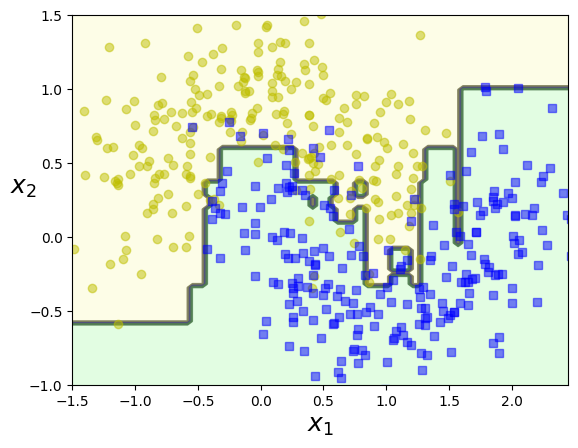

In [81]:
plot_decision_boundary(ada_clf, X, y)

### Gradient Boosting

#### Lets try a decision tree on a noisy quadratic dataset
#### Create a dummy quadratic dataset

In [82]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2+0.05*np.random.randn(100)

In [83]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [84]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [85]:
y3 = y2- tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [86]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3 ))
y_pred

array([0.75026781])

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

Text(0, 0.5, '$y$')

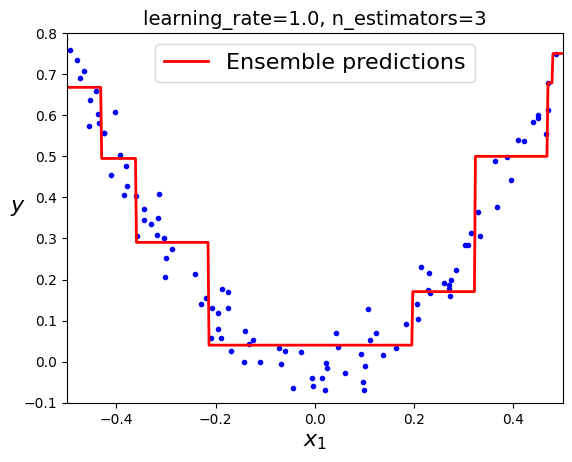

In [88]:
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X,y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
            for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimator = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimator)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=85)

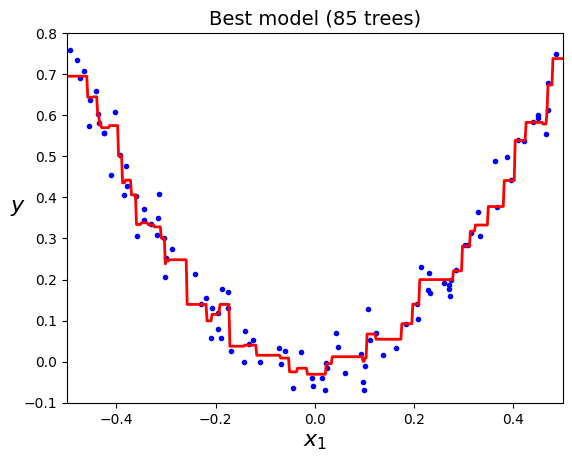

In [93]:
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimator, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)
plt.show();

In [96]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimator in range(1,120):
    gbrt.n_estimators = n_estimator
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break

In [97]:
import xgboost

In [98]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [101]:
y_pred = xgb_reg.predict(y_val)
y_pred

array([ 0.58459383,  0.5400119 , -0.06036694,  0.22831547,  0.03421189,
        0.74893564,  0.03672805,  0.03672805,  0.01854808,  0.03421189,
        0.74893564,  0.22269864,  0.74893564,  0.74893564,  0.0913825 ,
        0.14076371,  0.5944681 ,  0.30813774,  0.74893564,  0.03672805,
        0.01889667,  0.12487141,  0.74893564,  0.74893564,  0.03421189],
      dtype=float32)

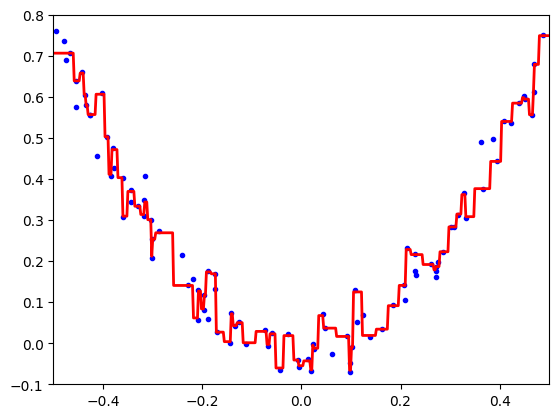

In [102]:
plot_predictions([xgb_reg], X, y, axes=[-0.5, 0.5, -0.1, 0.8])

In [106]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
y_pred

[0]	validation_0-rmse:0.22055
[1]	validation_0-rmse:0.16547
[2]	validation_0-rmse:0.12243
[3]	validation_0-rmse:0.10044
[4]	validation_0-rmse:0.08467
[5]	validation_0-rmse:0.07344
[6]	validation_0-rmse:0.06728
[7]	validation_0-rmse:0.06383
[8]	validation_0-rmse:0.06125
[9]	validation_0-rmse:0.05959
[10]	validation_0-rmse:0.05902
[11]	validation_0-rmse:0.05852
[12]	validation_0-rmse:0.05844
[13]	validation_0-rmse:0.05801
[14]	validation_0-rmse:0.05747
[15]	validation_0-rmse:0.05772


array([ 0.46412924,  0.3390584 , -0.02061522,  0.14163983,  0.2130764 ,
        0.6902828 ,  0.04338713,  0.09851967,  0.03748231,  0.19408132,
        0.6370147 ,  0.28463796,  0.37710163,  0.53952974,  0.2130764 ,
        0.19408132,  0.5941399 ,  0.35818118,  0.6902828 ,  0.16088979,
        0.16088979,  0.13984483,  0.44233695,  0.6902828 ,  0.14163983],
      dtype=float32)

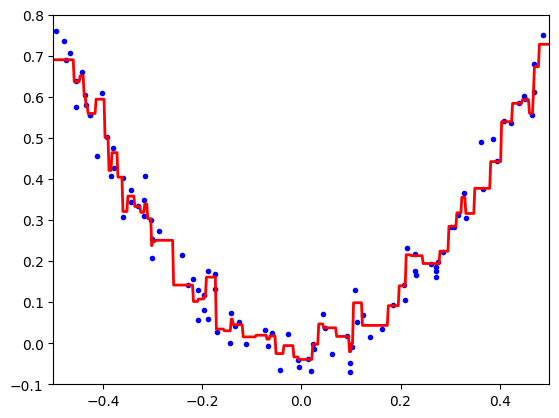

In [108]:
plot_predictions([xgb_reg], X, y, axes=[-0.5, 0.5, -0.1, 0.8])